In [2]:
import pandas as pd

In [ ]:
import pandas as pd
titanic_url = 'https://github.com/PinkWink/ML_tutorial/blob/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

In [3]:
import pandas as pd
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial'+ '/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
import pandas as pd
titanic_url = '/home/addinedu/Downloads/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

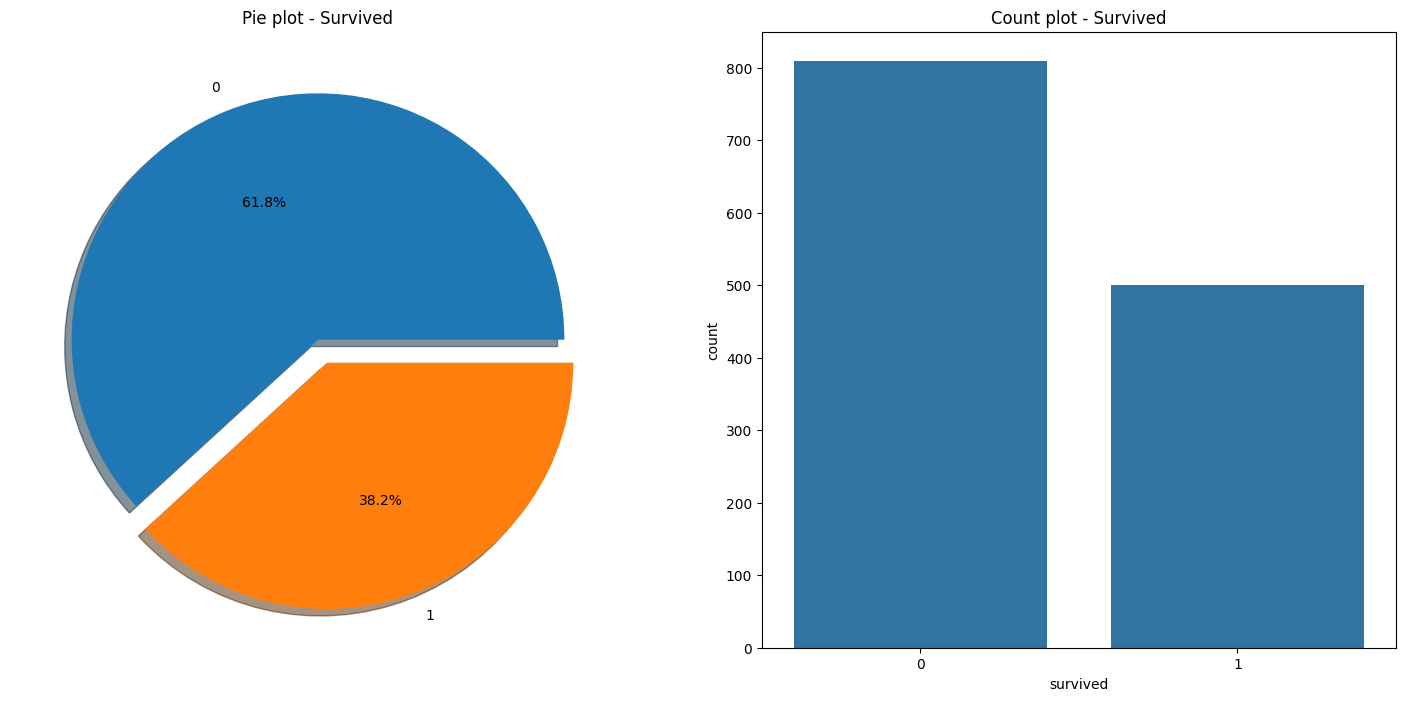

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

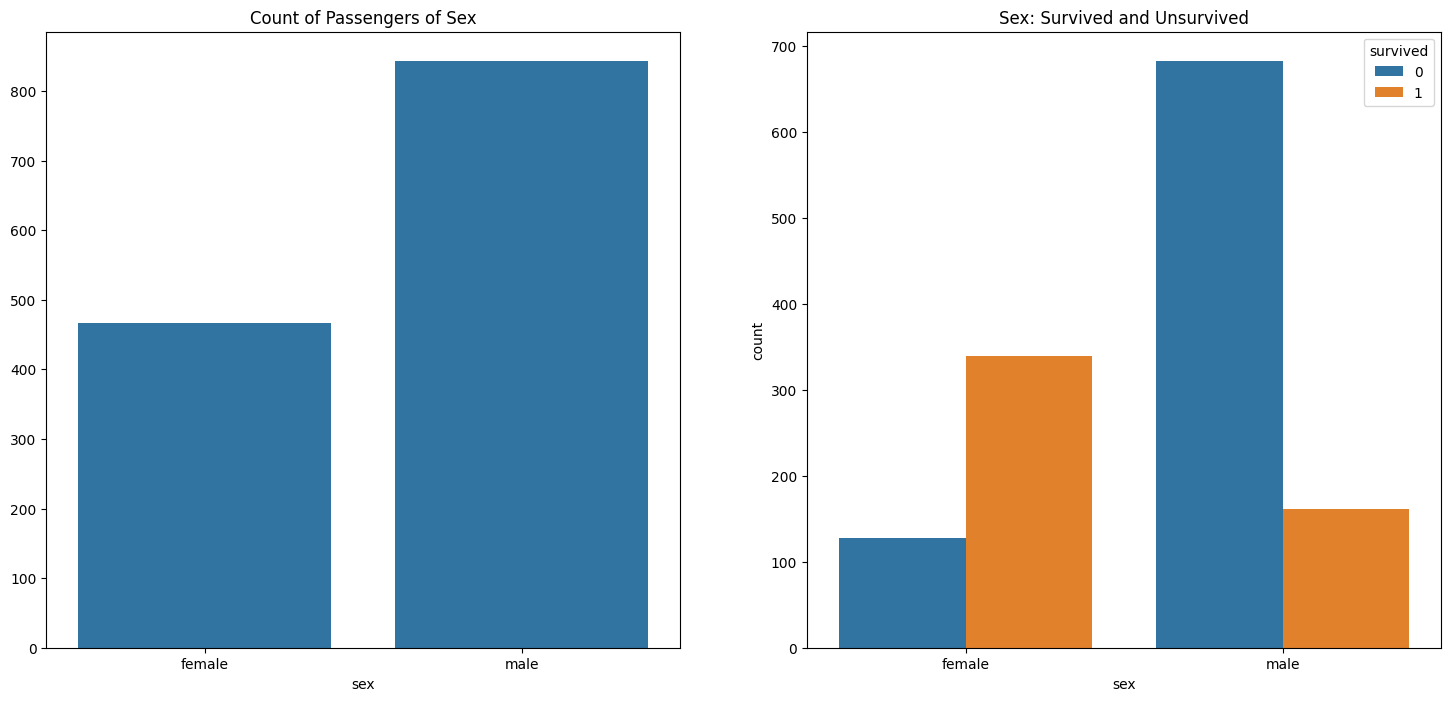

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')
sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1]) 
ax[1].set_title('Sex: Survived and Unsurvived')
plt.show()

In [ ]:
titanic.info()

In [ ]:
titanic['sex'].unique

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

In [ ]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

In [ ]:
import numpy as np
numeric_data = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [ ]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

In [ ]:
import numpy as np
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Decaprio : ', dt.predict_proba(dicaprio)[0,1])